Framentadura de su paisàgiu
===========================

[0. 0. 0. 0.]
[0.6039216 0.        0.        1.       ]
[0.8 0.  0.  1. ]
[1.         0.22352941 0.         1.        ]
[1.         0.48235294 0.         1.        ]
[1.         0.83137256 0.         1.        ]
[1. 1. 0. 1.]
[1.         1.         0.18039216 1.        ]
[1.        1.        0.7882353 1.       ]
[1. 1. 1. 1.]


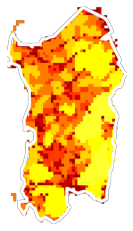

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np

# Reading PNG image file
def _get_image():
    return img.imread(
        "image-preparation/Landscape-fragmentation6-cropped-upscaled-colorized-recropped.png"
    )


im = _get_image()
colors = np.unique(im.reshape(-1, im.shape[2]), axis=0)

# Show image
plt.imshow(im)
plt.axis('off')

for curr_color in colors:
    print(curr_color)

In [5]:
import sys
import os
sys.path.append(os.path.dirname(os.path.abspath('')))

import helpers
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def _create_default_image_canvas(style_options):
    fig = plt.figure(
        figsize=(7.8, 10),
        dpi=150,
        facecolor=style_options["background_color"],
        tight_layout=True,
    )
    grid = gridspec.GridSpec(
        2, 2, height_ratios=[0.90, 0.10], width_ratios=[0.70, 0.30], hspace=0.1
    )

    axes = [fig.add_subplot(grid[0]), fig.add_subplot(grid[1])]
    return (fig, axes)


def _get_colors_and_classes():
    html_colors = ["ffff2e", "ffd400", "ff7b00", "ff3900", "cc0000", "9a0000"]
    classes = [0, 5, 10, 25, 50, 100]
    rgb_colors = [helpers.html_to_rgb(color) for color in html_colors]
    return (rgb_colors, classes)


def _plot_main_map(ax):
    im = _get_image()
    ax.imshow(im)

    # No box around plot
    ax.set_axis_off()


def _get_labels_from_classes(classes, colors):
    labels = []
    for num_label in range(0, len(colors)):
        if num_label < len(colors) - 1:
            curr_label = f"{classes[num_label]} - {classes[num_label+1]}"
        else:
            curr_label = f"> {classes[num_label]}"
        labels.append(curr_label)
    return labels


def _plot_legend(ax, colors, classes, title, style_options):
    from matplotlib.patches import Patch
    
    # No box around plot
    ax.set_axis_off()
    labels = _get_labels_from_classes(classes, colors)

    legend_elements = [
        Patch(facecolor=color, edgecolor=style_options["foreground_color"], label=label)
        for color, label in zip(colors, labels)
    ]
    
    ax.legend(
        handles=legend_elements,
        loc="center",
        ncol=1,
        facecolor=style_options["background_color"],
        fontsize=style_options["tick_label_size"],
        title_fontsize=style_options["axis_label_size"],
        title=title,
        frameon=False
    )


In [6]:
import helpers


def _plot_whole_infographic(title, label_title, description, info):
    # Overall settings
    style_options = helpers.set_style()
    colors, classes = _get_colors_and_classes()

    fig, axes = _create_default_image_canvas(style_options)

    _plot_main_map(axes[0])

    _plot_legend(axes[1], colors, classes, label_title, style_options)

    # Add text
    fig.suptitle(title, fontsize=style_options["title_size"], fontweight="bold")

    plt.figtext(
        0.999,
        0.5,
        info,
        rotation=90,
        ha="center",
        va="center",
        fontsize=style_options["small_text_size"],
        c=style_options["description_text_color"],
    )

    plt.figtext(
        0.02,
        0.02,
        "@sustsardinia",
        ha="left",
        va="center",
        fontdict={
            "size": style_options["tick_label_size"],
            "weight": "bold",
            "color": style_options["description_text_color"],
        },
    )
    plt.figtext(
        0.06,
        0.08,
        helpers.break_text(
            description, style_options["max_description_text_characters"]
        ),
        ha="left",
        va="center",
        wrap=True,
        fontdict={
            "size": style_options["description_text_size"],
            "color": style_options["description_text_color"],
        },
    )

/home/andrea/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


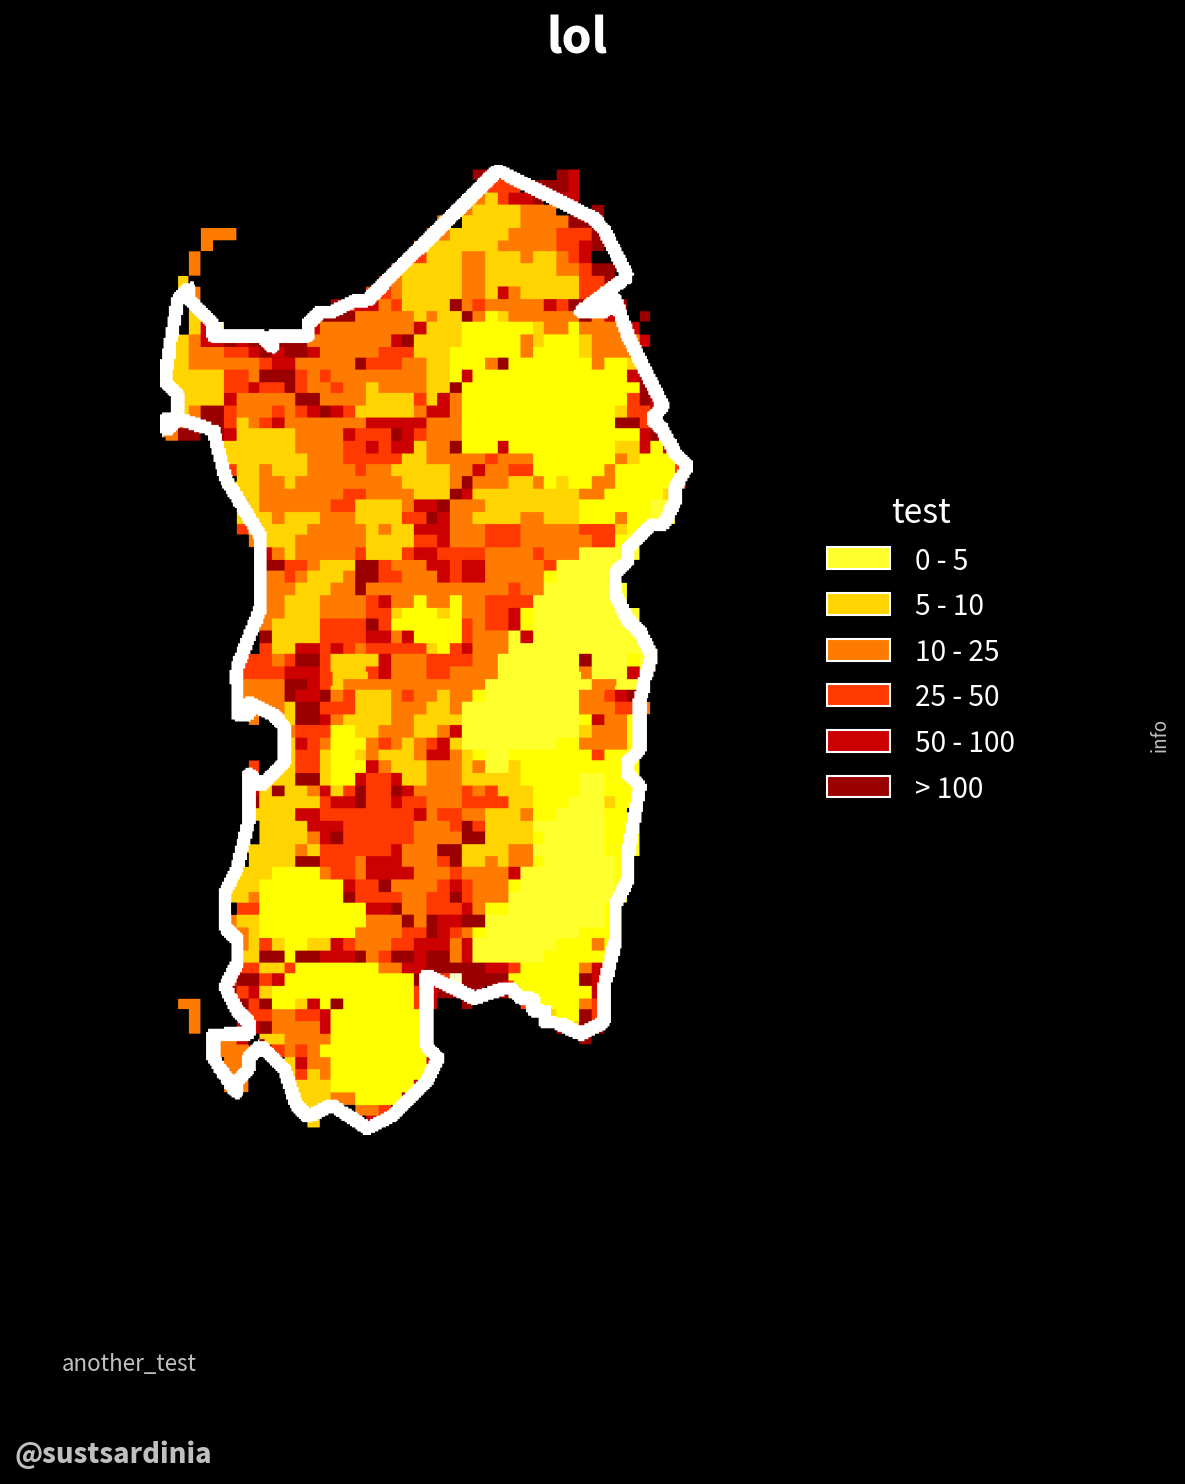

In [7]:
_plot_whole_infographic(
    title="lol", label_title="test", description="another_test", info="info"
)
# plt.savefig("figures/srd/gini.png", bbox_inches="tight")
